In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sym
from scipy.stats import chi2
import scipy.optimize as spo
import os
import os.path as path
import wget

In [4]:
path = "data_csv/Datos_"
colors = ["b","g","y","r"]

In [68]:
def GetRegression(x,y):
    m,b = np.polyfit(x,y,1)
    X = np.linspace(min(x),max(x),100)
    Y = m*X + b
    return X,Y,m,b

def GetUncertainty(m,b,x,y):
    Sum = np.sum((y - m*x - b)**2)
    N_2 = len(y)-2
    S_y = np.sqrt(Sum/N_2)
    N = len(y)
    denominator = N*np.sum(x**2) - (np.sum(x))**2
    S_m = S_y*np.sqrt(N/denominator)
    S_b = S_y*np.sqrt(np.sum(x**2)/denominator)
    un_M = S_m
    un_B =S_b
    return un_M,un_B

def GetR2(m, b, x, y):
    # Cálculo de la "bondad" del ajuste con base en el parámetro R^2:
    mean_y = np.sum(y)/len(y)
    reg_y = m*x + b
    SS_res = np.sum((y - reg_y)**2)
    SS_tot = np.sum((y - mean_y)**2)
    Rp2 = 1 - SS_res/SS_tot
    return Rp2

    

In [6]:
file = ["B","G","Y","R","IR"]
Data = [None,None,None,None,None]

In [7]:
for i in range(5):
    Data[i] = pd.read_csv(path+file[i]+".csv",sep=";")

In [8]:
I = [None,None,None,None,None]
V = [None,None,None,None,None]

I_err = np.ones(21)*0.25e-8
V_err = np.ones(21)*1e-3


for i in range(5):
    I[i] = np.flip(np.array(Data[i]["Intensidad"],dtype=float)*1e-8)
    V[i] = np.flip(np.array(Data[i]["Voltaje"],dtype=float))

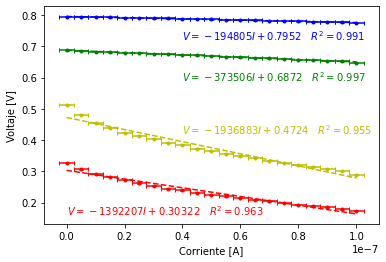

[-194805.19480518965, -373506.49350649, -1936883.1168831154, -1392207.7922077908] [0.7952640692640691, 0.6872943722943722, 0.4724155844155843, 0.3032294372294371]
[ 4285.95592986  4510.39435683 96308.56999186 62172.63795164] [0.00025052 0.00026364 0.00562945 0.00363413]
[0.991 0.997 0.955 0.963]


In [71]:
M,B = [0,0,0,0],[0,0,0,0]
V_frenado = np.array([])
wave_lenght = np.array([469,567,590,659])
wlen = wave_lenght*1e-9
R2 = np.array([])

for i in range(4):
    # Cálculo principal de la regresión y sus valores correspondientes:
    X,Y,M[i],B[i] = GetRegression(I[i],V[i])
    plt.errorbar(I[i],V[i],color=colors[i],yerr=V_err,xerr=I_err,fmt=".",capsize=2)
    plt.plot(X,Y,"%s--"%(colors[i]))
    plt.xlabel("Corriente [A]")
    plt.ylabel("Voltaje [V]")

    V_frenado = np.append(V_frenado,B[i])
    Rp2 = GetR2(M[i], B[i], I[i], V[i]) # Cálculo general de la correlación de nuestra regresión.
    R2 = np.append(R2, round(Rp2, 3))
    


plt.text(0.4e-7,0.72,r"$V = -194805I + 0.7952 \quad R^2 = {}$".format(R2[0]),color="b")

plt.text(0.4e-7,0.59,r"$V = -373506I + 0.6872 \quad R^2 = {}$".format(R2[1]),color="g")

plt.text(0.4e-7,0.42,r"$V = -1936883I + 0.4724 \quad R^2 = {}$".format(R2[2]),color="y")

plt.text(0.0e-7,0.16,r"$V = -1392207I + 0.30322 \quad R^2 = {}$".format(R2[3]),color="r")

plt.show()

print(M,B)

uncertainty_M,uncertainty_B = np.ones(4),np.ones(4)

for i in range(4):
    uncertainty_M[i], uncertainty_B[i] = GetUncertainty(M[i],B[i],I[i],V[i])

print(uncertainty_M,uncertainty_B)
print(R2)


Incertidumbre de m: 1.3111102992670755e-34. Incertidumbre de b: 7.040121855477433e-20
Valor de m: 4.151294571079576e-34. Valor de b: -1.3070856509401787e-19
Valor de R2: 0.834.


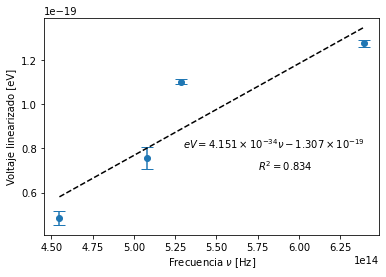

In [89]:
e = 1.60217663e-19
c = 2.99792458e8
frequency =c/wlen
V_f = np.array(V_frenado)*e
dV_f = np.array([0.01,0.007,0.03,0.02])*e
plt.errorbar(frequency,V_f,dV_f,fmt="o",capsize=6)


plt.xlabel(r"Frecuencia $\nu$ [Hz]")
plt.ylabel(r"Voltaje linearizado [eV]")
plt.text(5.3e14,0.8e-19,r"$eV = 4.151\times10^{-34}\nu - 1.307\times10^{-19}$")
X,Y,m,b = GetRegression(frequency,V_f)

R2 = round(GetR2(m, b, frequency, V_f), 3)
plt.text(5.75e14,0.7e-19,r"$R^2 = %s$"%(R2))

plt.plot(X,Y,"k--")
print("Incertidumbre de m: %s. Incertidumbre de b: %s"%(GetUncertainty(m,b,frequency,V_f)))
print("Valor de m: %s. Valor de b: %s"%(m,b))
print("Valor de R2: %s."%(R2))

-1484155.8441558438 0.2842554112554112


Text(6.5e-08, 0.20004761904761903, '$R^2 = 0.968$')

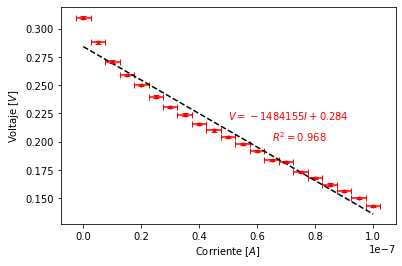

In [95]:
plt.errorbar(I[4],V[4],color="r",yerr=V_err,fmt=".",xerr=I_err,capsize=3)
plt.ylabel(r"Voltaje [$V$]")
plt.xlabel(r"Corriente [$A$]")

X,Y,m,b = GetRegression(I[4],V[4])
x = np.linspace(min(X),max(X))
y = m*x + b
plt.plot(x,y,"k--",)
plt.text(np.mean(X),np.mean(Y)+0.01,r"$V = -1484155I + 0.284$",color="r")
print(m,b)
GetUncertainty(m,b,I[4],V[4])

R2 = round(GetR2(m, b, I[4], V[4]), 3)
plt.text(np.mean(X) + 0.15e-7,np.mean(Y)-0.01,r"$R^2 = %s$"%(R2), color = 'r')